In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import mplhep as hep
hep.style.use([hep.style.ATLAS])

data = pd.read_parquet('~/H_Zg/samples_processed/MC23/Zee_deriv_epairs_all_events_cut_and_predicted.parquet')
cut_zee_model = np.max(data['score'][data['prediction'] == 0])

In [16]:
print(data.columns)

Index(['event_index', 'el1_index', 'el2_index', 'runNumber', 'eventNumber',
       'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
       'm_ee', 'isZ', 'el1_pt', 'el1_eta', 'el1_phi', 'el1_m', 'el1_charge',
       'el1_ptvarcone20', 'el1_topoetcone20', 'el1_topoetcone40', 'el1_f1',
       'el1_neflowisol20', 'el1_truthPdgId', 'el1_truthType',
       'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFCommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
       'el2_truthOr

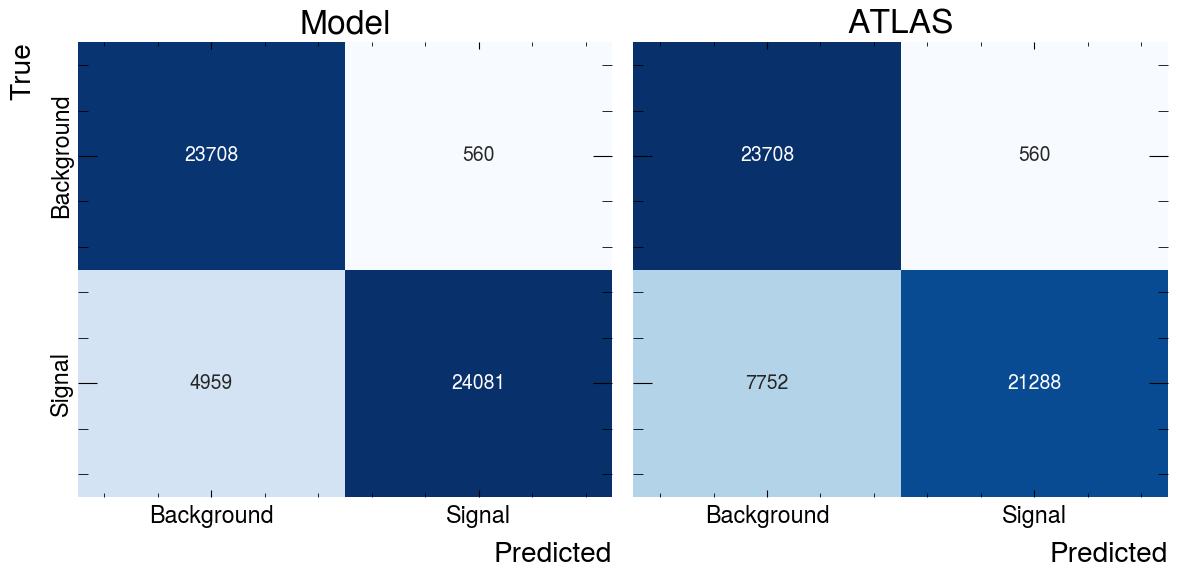

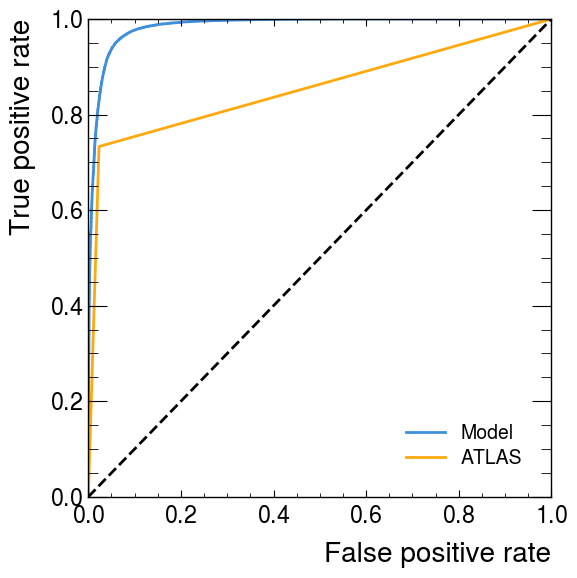

In [17]:
# confusion matrix

cm_model = confusion_matrix(data['isZ'], data['prediction'])
cm_ATLAS = confusion_matrix(data['isZ'], data['ATLAS_label'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_model, annot=True, fmt='d', ax=ax[0], cmap='Blues', cbar=False)
sns.heatmap(cm_ATLAS, annot=True, fmt='d', ax=ax[1], cmap='Blues', cbar=False)

ax[0].set_title('Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_xticklabels(['Background', 'Signal'])
ax[0].set_yticklabels(['Background', 'Signal'])

ax[1].set_title('ATLAS')
ax[1].set_xlabel('Predicted')
ax[1].set_yticklabels([])
ax[1].set_xticklabels(['Background', 'Signal'])
fig.tight_layout()

# ROC curve

fpr_model, tpr_model, _ = roc_curve(data['isZ'], data['score'])
fpr_ATLAS, tpr_ATLAS, _ = roc_curve(data['isZ'], data['ATLAS_label'])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_model, tpr_model, label='Model')
ax.plot(fpr_ATLAS, tpr_ATLAS, label='ATLAS')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()

no


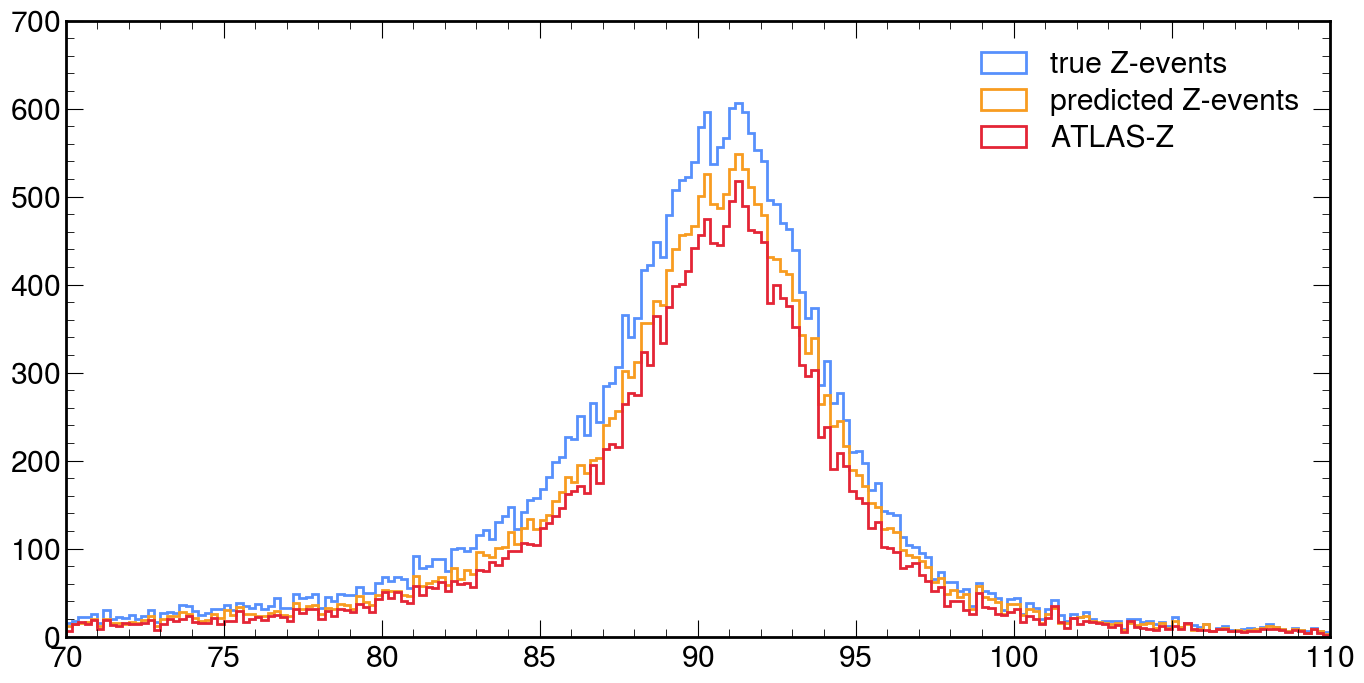

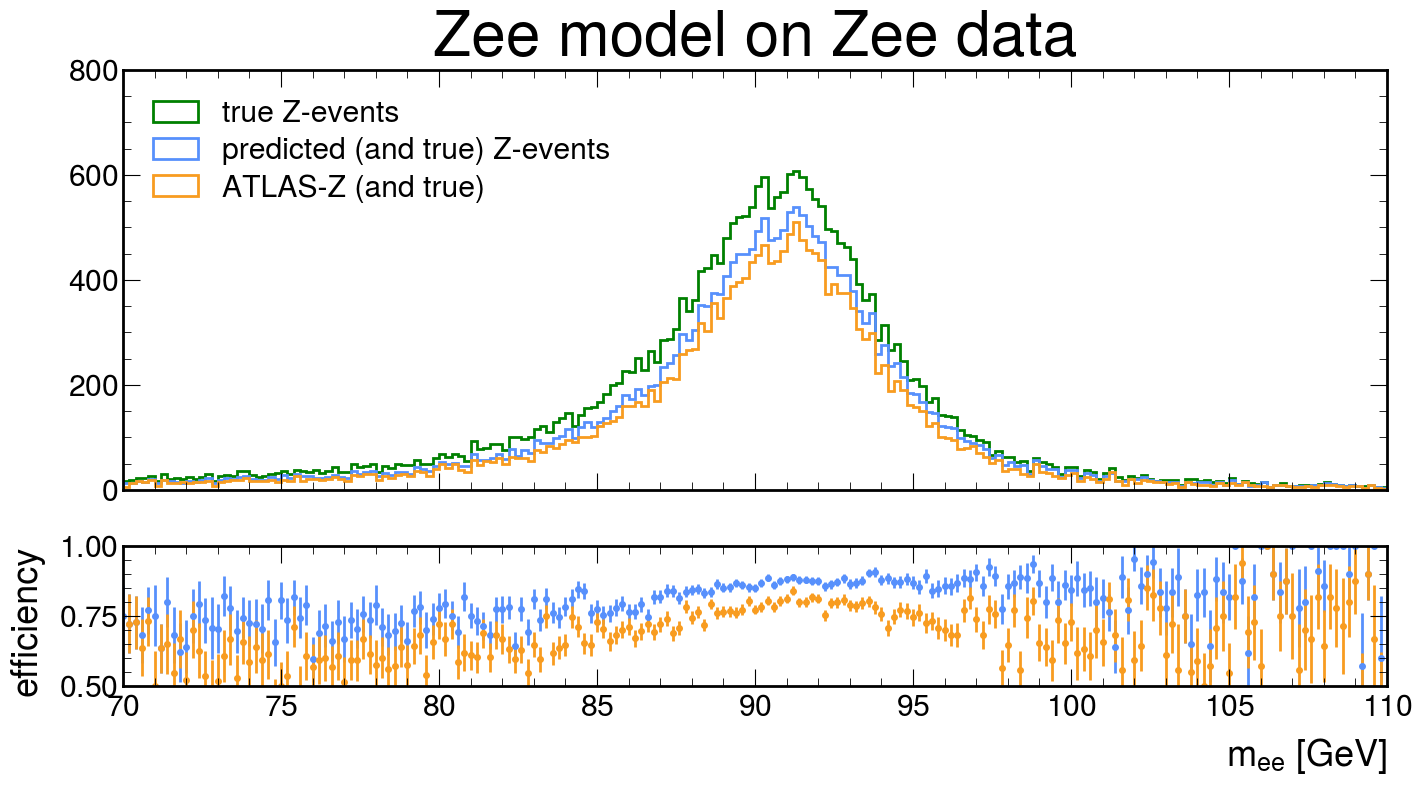

In [18]:
n_bins = 200
plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(data['m_ee'][data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events')
ax.hist(data['m_ee'][data['prediction']], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted Z-events')
ax.hist(data['m_ee'][data['ATLAS_label']==1], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z')
ax.legend()

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(data['m_ee'][data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(data['m_ee'][(data['prediction']==1) & (data['isZ']==1)], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted (and true) Z-events')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(data['m_ee'][(data['ATLAS_label']==1) & (data['isZ']==1)], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.5,1)

ax[0].set_title('Zee model on Zee data')
# ax[1].legend()

print('no')

In [19]:
higgs_data = pd.read_parquet('~/H_Zg/samples_processed/MC23/higgs_data_with_predictions.parquet')


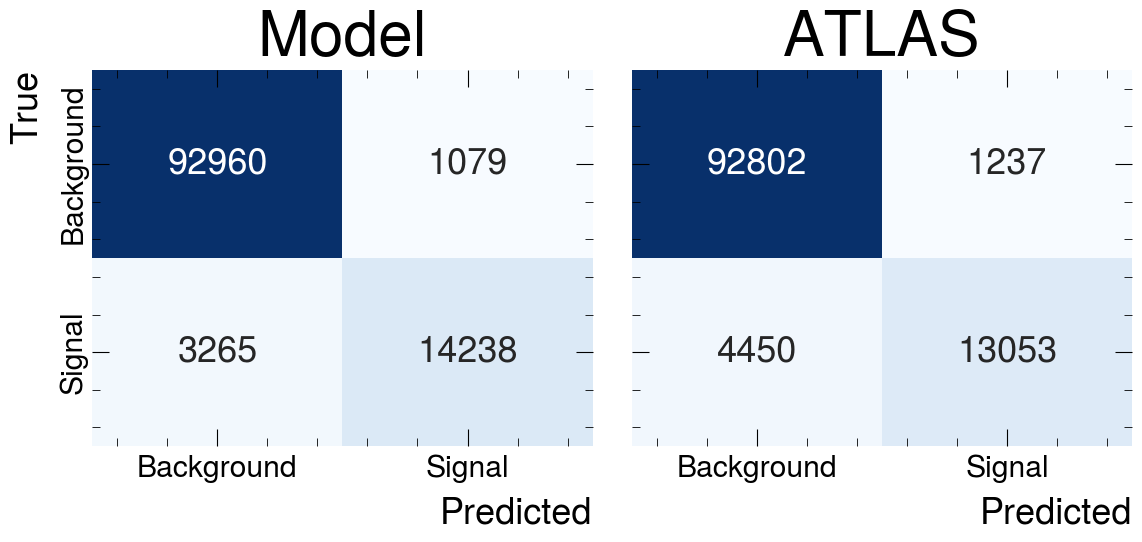

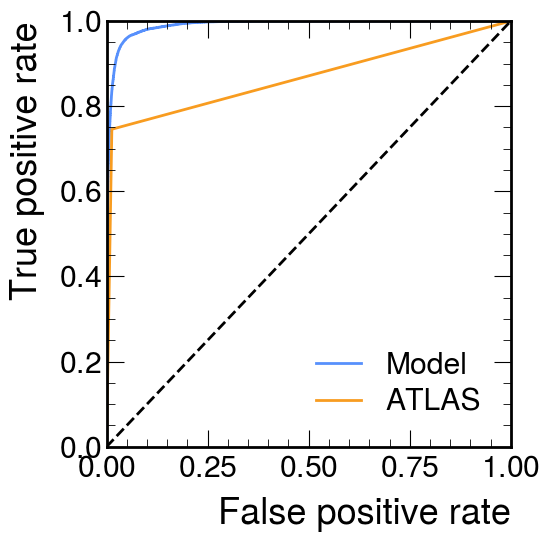

In [20]:
# confusion matrix

cm_model = confusion_matrix(higgs_data['isZ'], higgs_data['prediction'])
cm_ATLAS = confusion_matrix(higgs_data['isZ'], higgs_data['ATLAS_label'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_model, annot=True, fmt='d', ax=ax[0], cmap='Blues', cbar=False)
sns.heatmap(cm_ATLAS, annot=True, fmt='d', ax=ax[1], cmap='Blues', cbar=False)

ax[0].set_title('Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_xticklabels(['Background', 'Signal'])
ax[0].set_yticklabels(['Background', 'Signal'])

ax[1].set_title('ATLAS')
ax[1].set_xlabel('Predicted')
ax[1].set_yticklabels([])
ax[1].set_xticklabels(['Background', 'Signal'])
fig.tight_layout()

# ROC curve

fpr_model, tpr_model, _ = roc_curve(higgs_data['isZ'], higgs_data['score'])
fpr_ATLAS, tpr_ATLAS, _ = roc_curve(higgs_data['isZ'], higgs_data['ATLAS_label'])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_model, tpr_model, label='Model')
ax.plot(fpr_ATLAS, tpr_ATLAS, label='ATLAS')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()

Text(0.5, 1.0, 'Zee model on Higgs data')

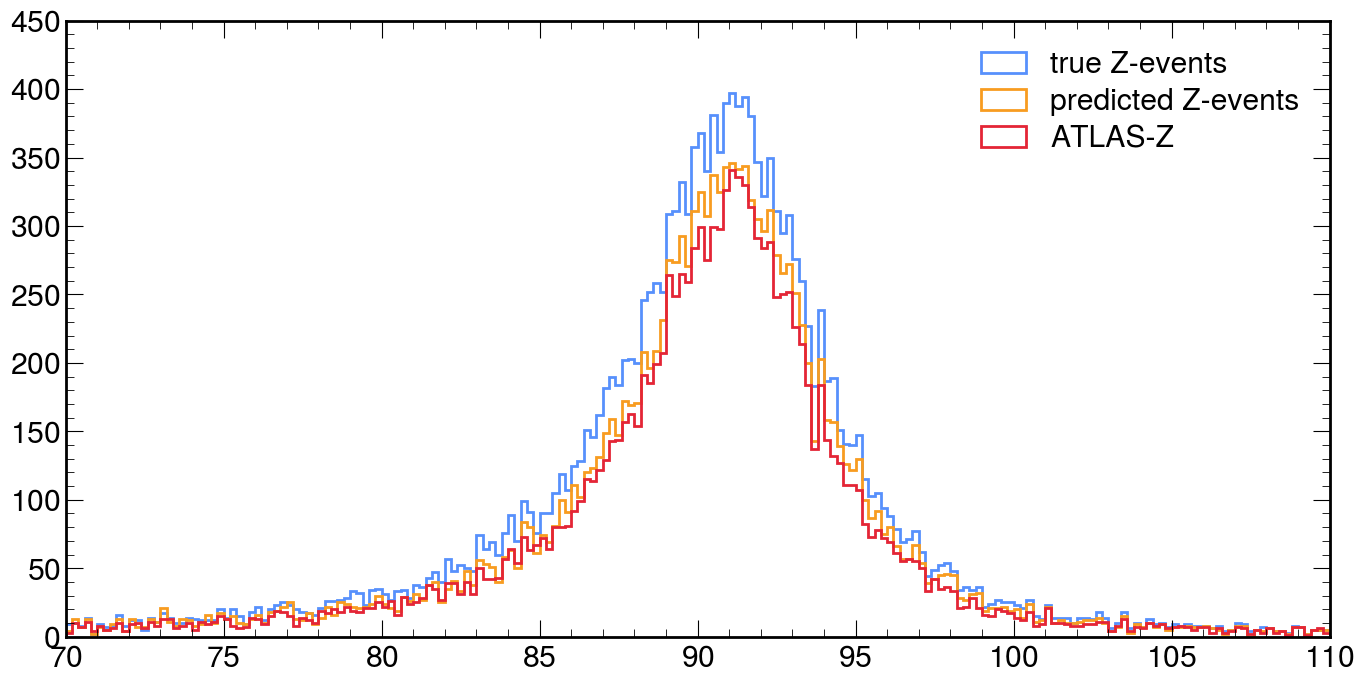

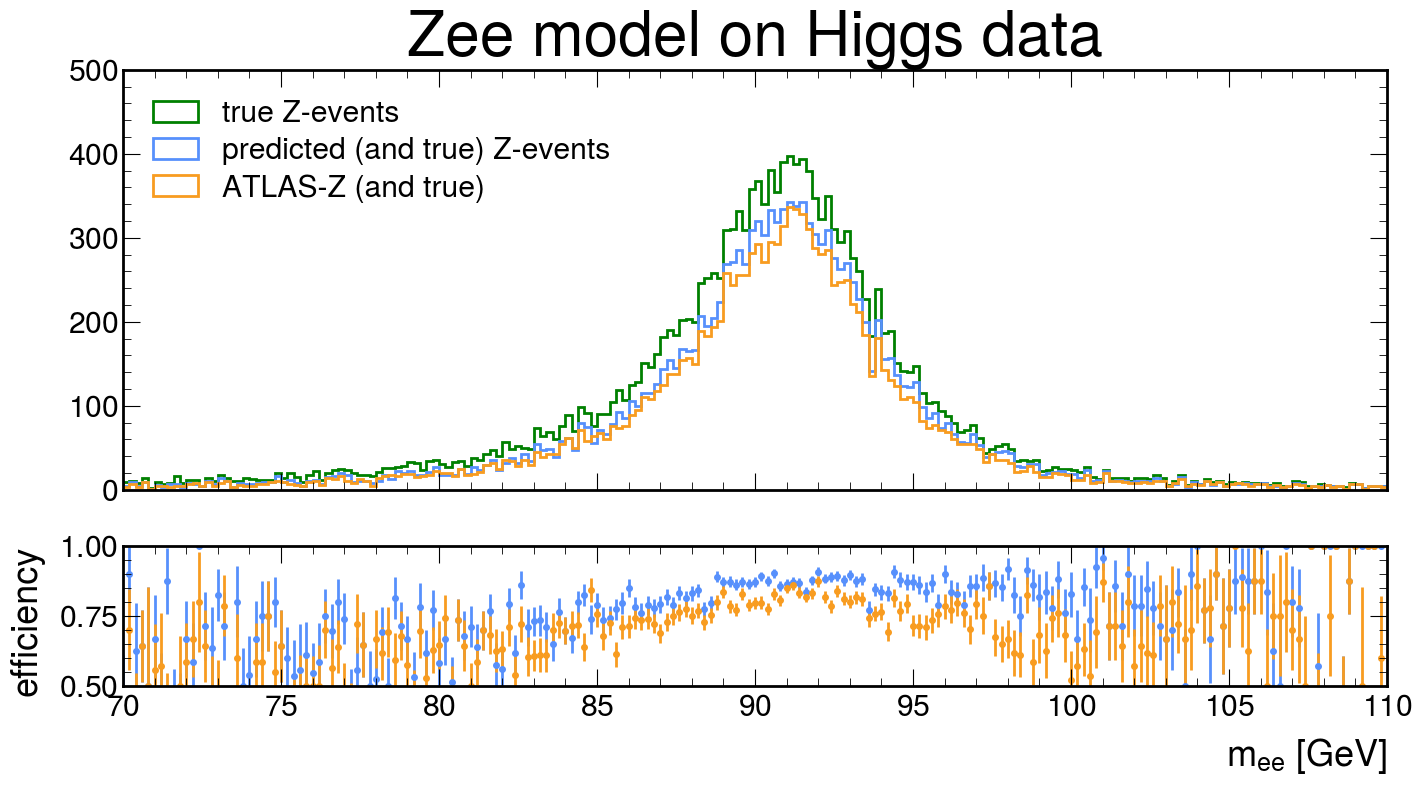

In [21]:
n_bins = 200
plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(higgs_data['m_ee'][higgs_data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events')
ax.hist(higgs_data['m_ee'][higgs_data['prediction']], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted Z-events')
ax.hist(higgs_data['m_ee'][higgs_data['ATLAS_label']==1], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z')
ax.legend()

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(higgs_data['m_ee'][higgs_data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['prediction']==1) & (higgs_data['isZ']==1)], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted (and true) Z-events')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['ATLAS_label']==1) & (higgs_data['isZ']==1)], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.5,1)

ax[0].set_title('Zee model on Higgs data')

# ax[1].legend()

In [22]:


m_ee = np.linspace(30, 150, 1000)
dm_ee = m_ee[1] - m_ee[0]
avg_score_bck = np.zeros_like(m_ee)
avg_score = np.zeros_like(m_ee)
avg_score_sig = np.zeros_like(m_ee)

sig_bck = np.zeros_like(m_ee)
sig_all = np.zeros_like(m_ee)
sig_sig = np.zeros_like(m_ee)

for i, m in enumerate(m_ee):
    avg_score_bck[i] = np.mean(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2)) & (data['isZ']==0)])
    sig_bck = np.std(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2)) & (data['isZ']==0)])
    avg_score[i] = np.mean(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2))])
    sig_all = np.std(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2))])
    avg_score_sig[i] = np.mean(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2)) & (data['isZ']==1)])
    sig_sig = np.std(data['score'][((data['m_ee'] > m - dm_ee/2) & (data['m_ee'] < m + dm_ee/2)) & (data['isZ']==1)])


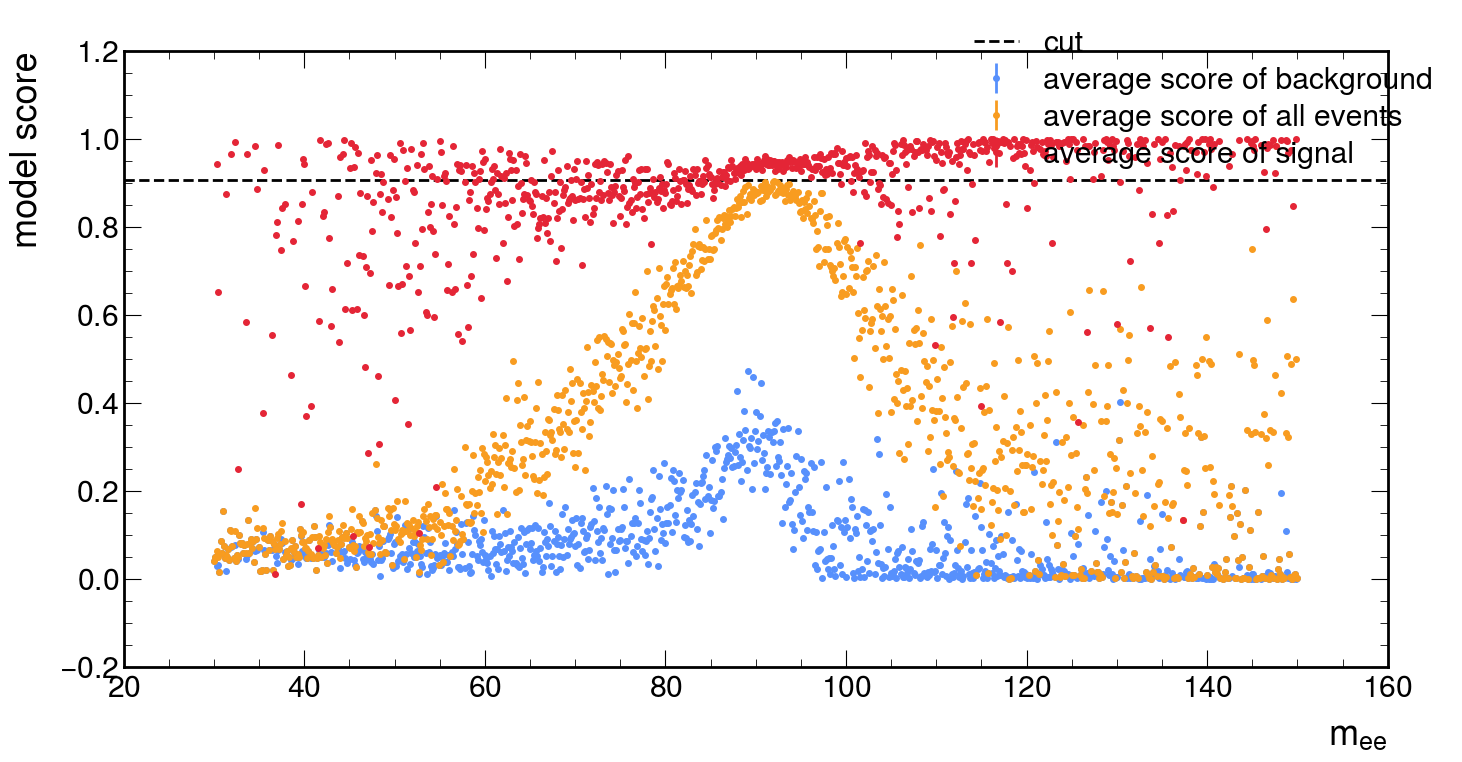

In [23]:
fig, ax = plt.subplots( figsize=(16, 8))
# ax.plot(data['m_ee'][data['isZ']==0], data['score'][data['isZ']==0], '.', label='background')
ax.set_xlabel('$m_{ee}$')
ax.set_ylabel('model score')
# ax.set_xlim(30, 150)
ax.errorbar(m_ee, avg_score_bck,yerr=sig_bck,fmt='.', label='average score of background')
ax.errorbar(m_ee, avg_score,yerr=sig_all,fmt='.', label='average score of all events')
ax.errorbar(m_ee, avg_score_sig,yerr=sig_sig,fmt='.', label='average score of signal')
ax.plot([20, 160], [cut_zee_model, cut_zee_model], 'k--', label='cut')
fig.legend()

no


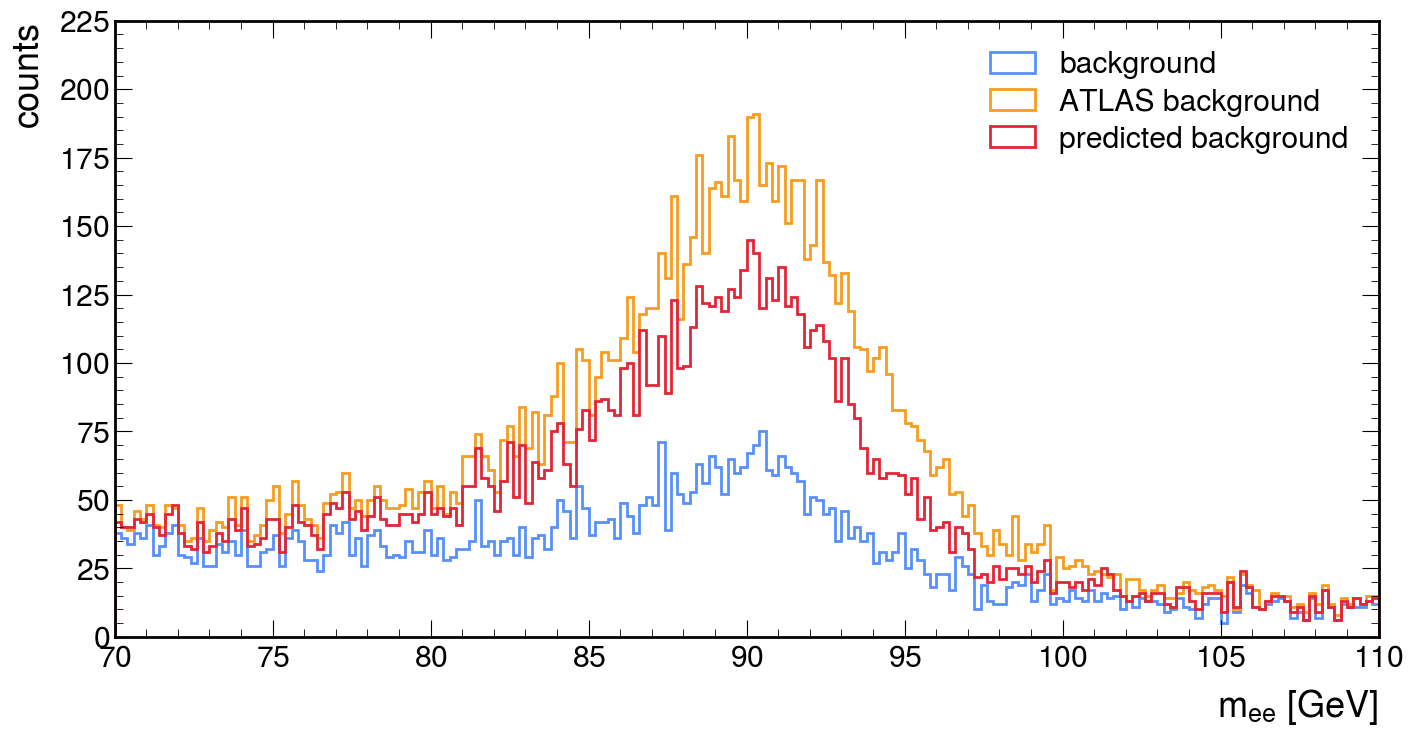

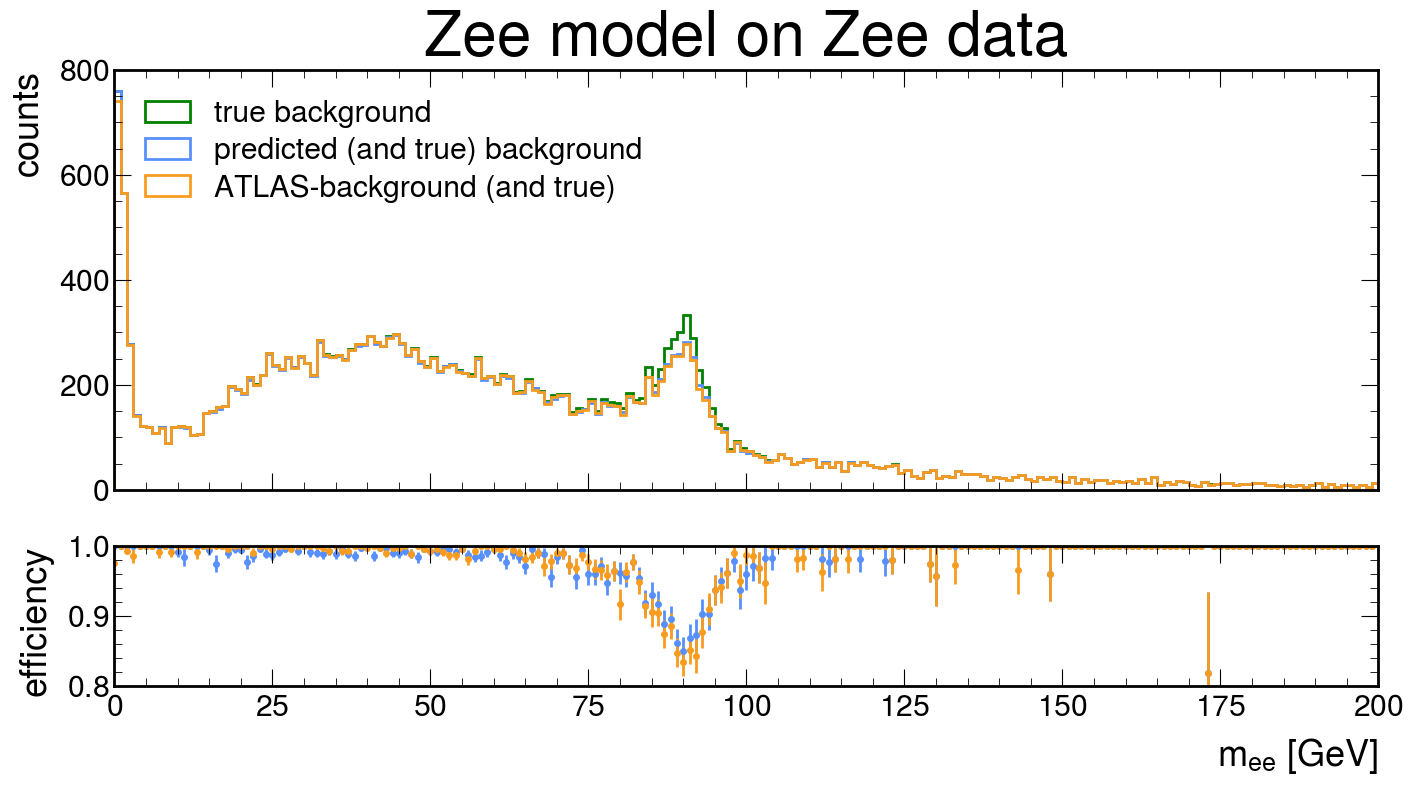

In [24]:
# mass distribution of background:

fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(data['m_ee'][data['isZ']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='background')
ax.hist(data['m_ee'][data['ATLAS_label']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='ATLAS background')
ax.hist(data['m_ee'][data['prediction']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='predicted background')
ax.legend()

ax.set_xlabel('$m_{ee}$ [GeV]')
ax.set_ylabel('counts')

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(data['m_ee'][data['isZ']==0], bins=n_bins, range=(0, 200),linewidth=2, histtype='step', label='true background', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(data['m_ee'][(data['prediction']==0) & (data['isZ']==0)], bins=n_bins, range=(0, 200),linewidth=2, histtype='step', label='predicted (and true) background')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(data['m_ee'][(data['ATLAS_label']==0) & (data['isZ']==0)], bins=n_bins,linewidth=2, range=(0, 200), histtype='step', label='ATLAS-background (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.8,1)

ax[0].set_title('Zee model on Zee data')
ax[0].set_ylabel('counts')

print('no')

no


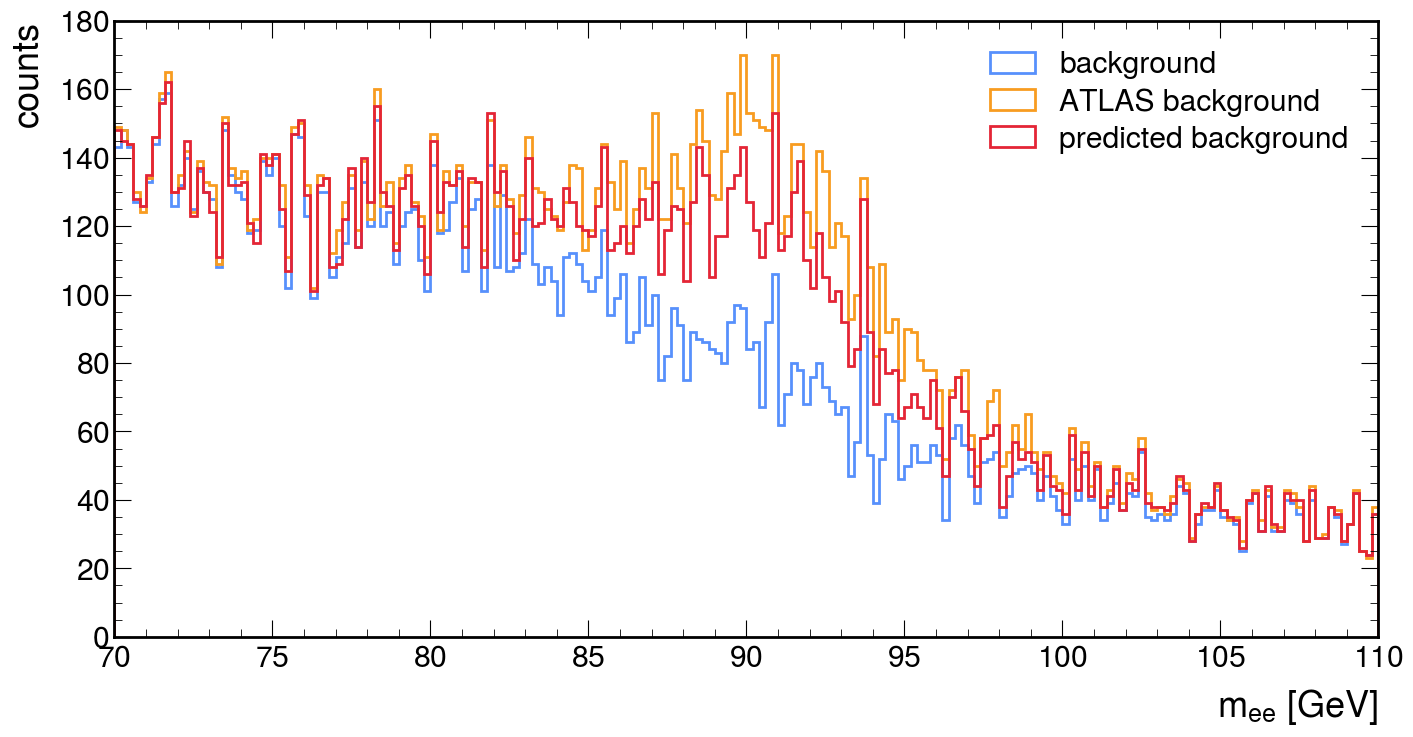

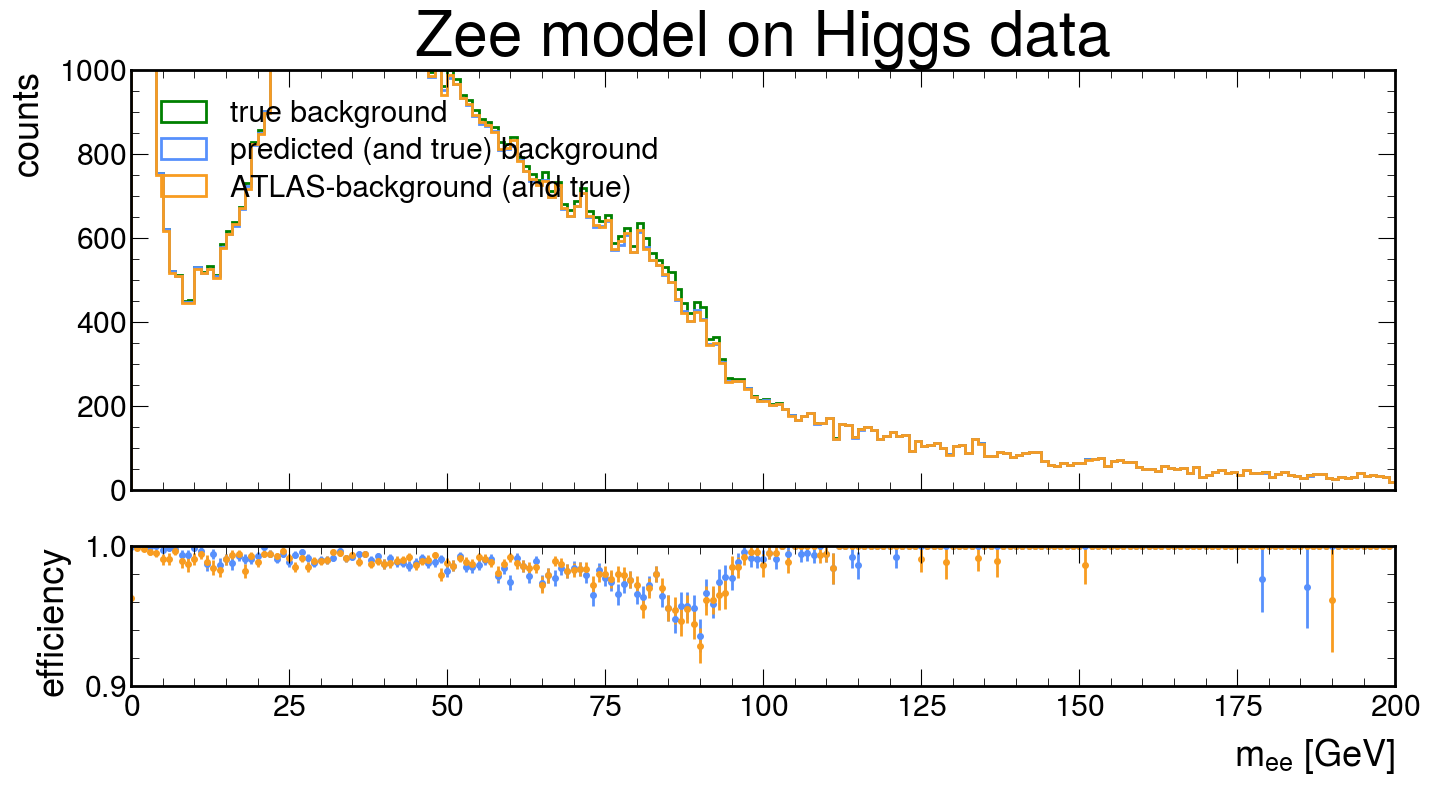

In [25]:
# mass distribution of background on higgs data:

fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(higgs_data['m_ee'][higgs_data['isZ']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='background')
ax.hist(higgs_data['m_ee'][higgs_data['ATLAS_label']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='ATLAS background')
ax.hist(higgs_data['m_ee'][higgs_data['prediction']==0], bins=200, range=(70, 110),linewidth=2, histtype='step', label='predicted background')
ax.legend()
ax.set_xlabel('$m_{ee}$ [GeV]')
ax.set_ylabel('counts')

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(higgs_data['m_ee'][higgs_data['isZ']==0], bins=n_bins, range=(0, 200),linewidth=2, histtype='step', label='true background', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['prediction']==0) & (higgs_data['isZ']==0)], bins=n_bins, range=(0, 200),linewidth=2, histtype='step', label='predicted (and true) background')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['ATLAS_label']==0) & (higgs_data['isZ']==0)], bins=n_bins,linewidth=2, range=(0, 200), histtype='step', label='ATLAS-background (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.9,1)

ax[0].set_title('Zee model on Higgs data')
ax[0].set_ylabel('counts')
ax[0].set_ylim(0, 1000)

print('no')

no


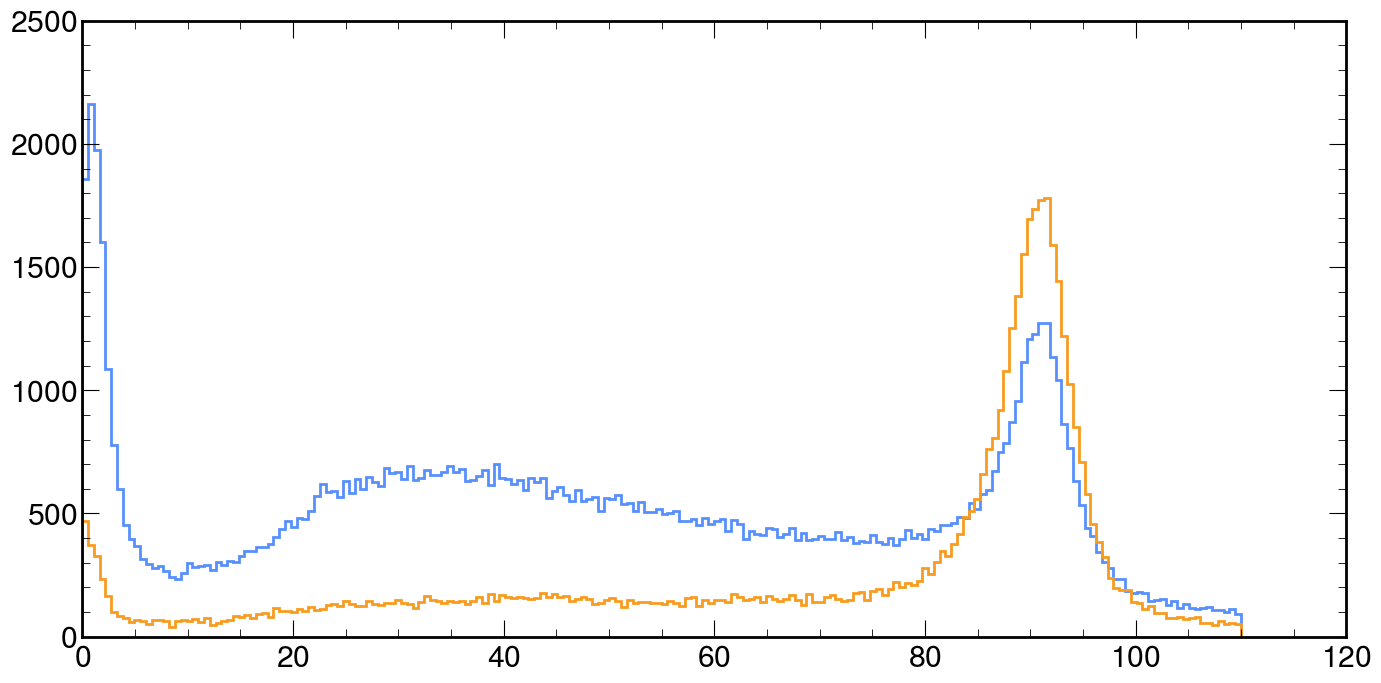

In [26]:
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(higgs_data['m_ee'],bins=200, range=(0, 110),linewidth=2, histtype='step', label='Higgs data')
ax.hist(data['m_ee'],bins=200, range=(0, 110),linewidth=2, histtype='step', label='Zee data')
print('no')

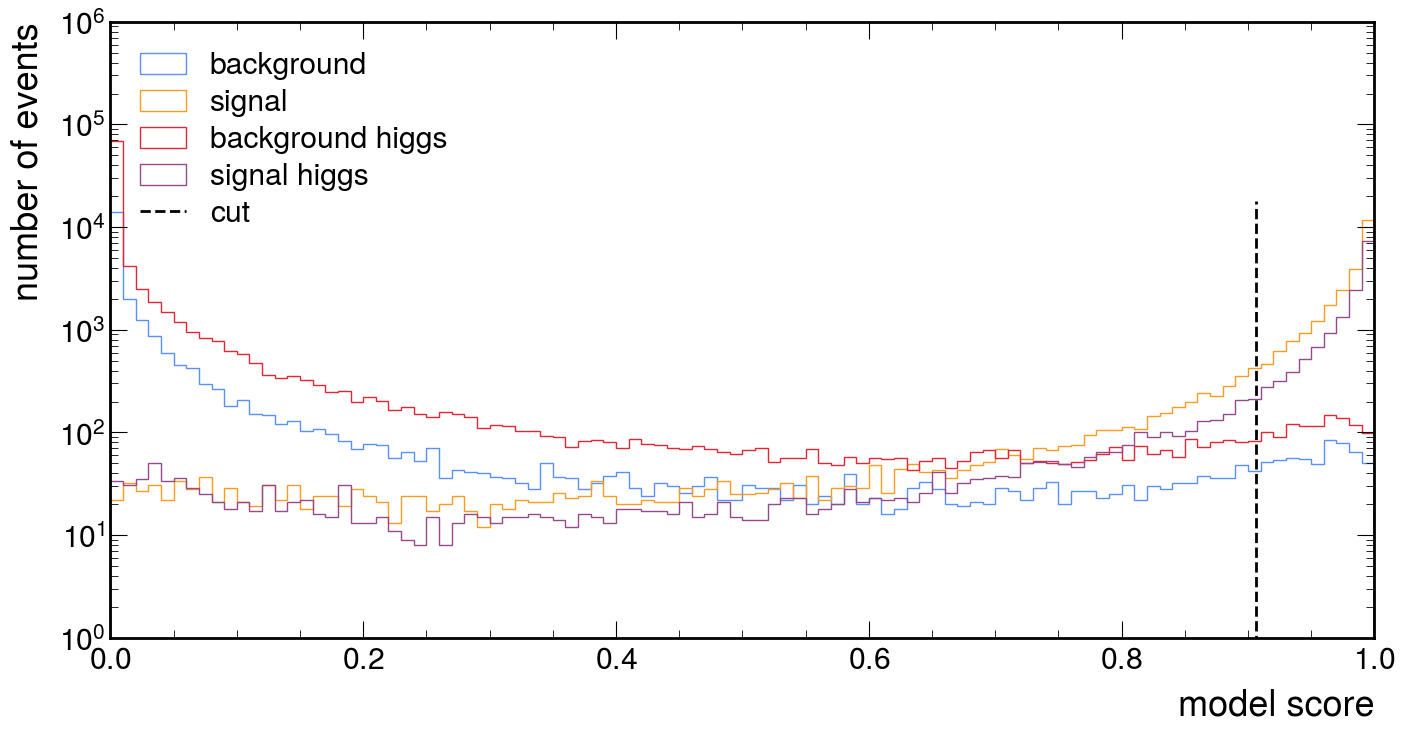

In [27]:
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(data['score'][data['isZ']==0], bins=100, range=(0,1), histtype='step', label='background')
ax.hist(data['score'][data['isZ']==1], bins=100, range=(0,1), histtype='step', label='signal')
ax.hist(higgs_data['score'][higgs_data['isZ']==0], bins=100, range=(0,1), histtype='step', label='background higgs')
ax.hist(higgs_data['score'][higgs_data['isZ']==1], bins=100, range=(0,1), histtype='step', label='signal higgs')
ax.plot([cut_zee_model, cut_zee_model], [0, 18000], 'k--', label='cut')
ax.set_xlabel('model score')
ax.set_ylabel('number of events')
ax.set_yscale('log')
ax.legend()

In [28]:
from scipy.stats import ks_2samp

ks_2samp(higgs_data['m_ee'][higgs_data['isZ']==1], data['m_ee'][data['isZ']==1])

KstestResult(statistic=0.026428367887818993, pvalue=4.6451726768958897e-07, statistic_location=88.98787959484697, statistic_sign=-1)

no


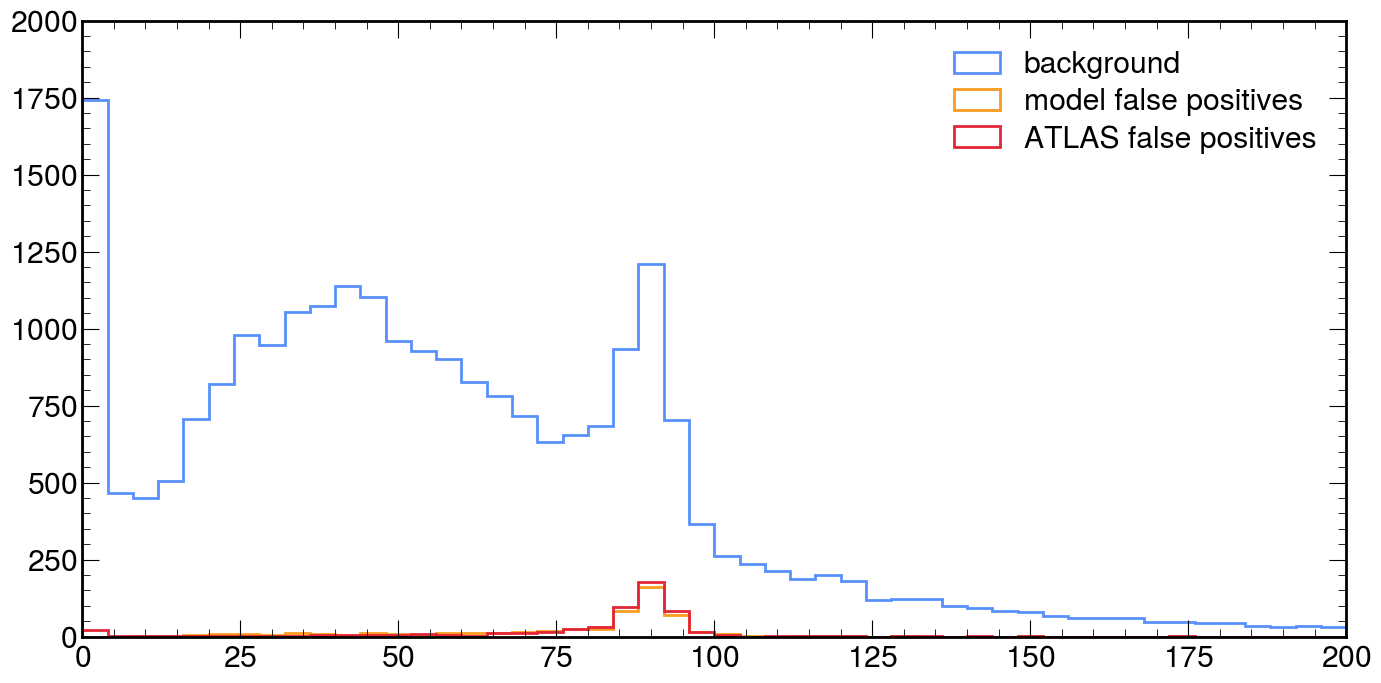

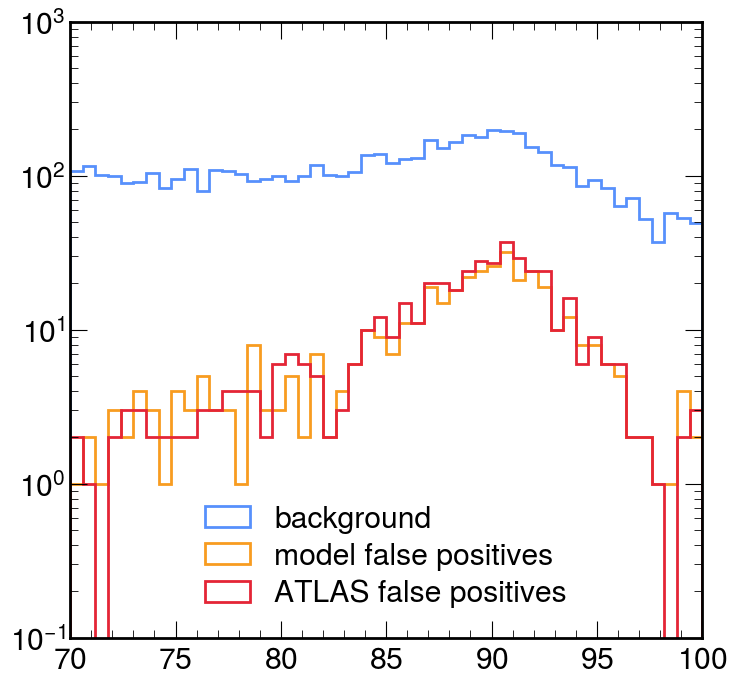

In [46]:
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(data['m_ee'][data['isZ']==0], bins=50, range=(0, 200),linewidth=2, histtype='step', label='background')
ax.hist(data['m_ee'][(data['isZ']==0) & data['prediction']], bins=50, range=(0, 200),linewidth=2, histtype='step', label='model false positives')
ax.hist(data['m_ee'][(data['isZ']==0) & data['ATLAS_label']], bins=50, range=(0, 200),linewidth=2, histtype='step', label='ATLAS false positives')

ax.legend()
fig, ax = plt.subplots( figsize=(8, 8))
ax.hist(data['m_ee'][data['isZ']==0], bins=50, range=(70, 100),linewidth=2, histtype='step', label='background')
ax.hist(data['m_ee'][(data['isZ']==0) & data['prediction']], bins=50, range=(70, 100),linewidth=2, histtype='step', label='model false positives')
ax.hist(data['m_ee'][(data['isZ']==0) & data['ATLAS_label']], bins=50, range=(70, 100),linewidth=2, histtype='step', label='ATLAS false positives')
ax.set_yscale('log')
ax.legend()

print('no')

/tmp/ipykernel_1539135/816180947.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


no


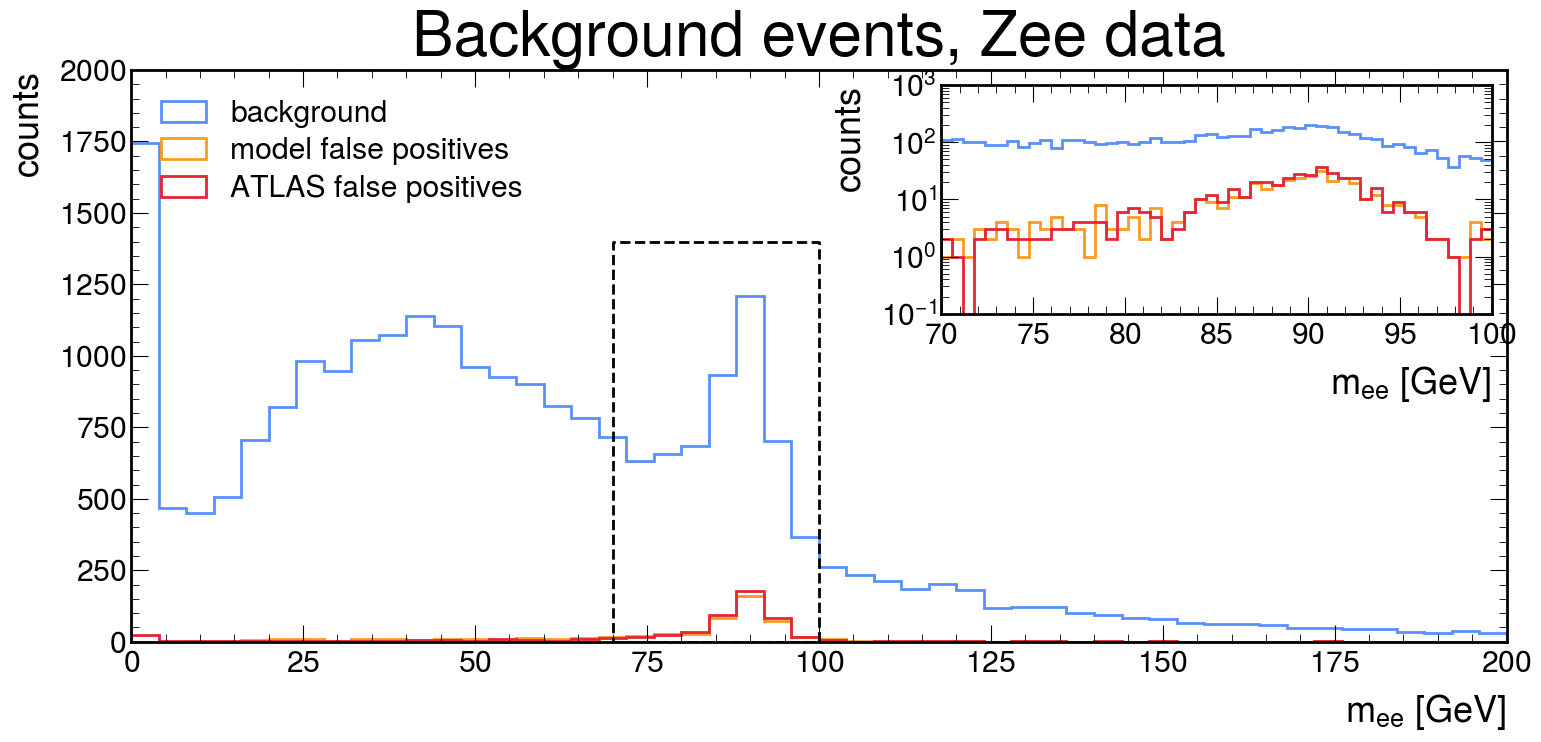

In [61]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data['m_ee'][data['isZ']==0], bins=50, range=(0, 200), linewidth=2, histtype='step', label='background')
ax.hist(data['m_ee'][(data['isZ']==0) & data['prediction']], bins=50, range=(0, 200), linewidth=2, histtype='step', label='model false positives')
ax.hist(data['m_ee'][(data['isZ']==0) & data['ATLAS_label']], bins=50, range=(0, 200), linewidth=2, histtype='step', label='ATLAS false positives')
ax.legend(loc= 'upper left')
ax.plot([70, 100, 100, 70, 70], [0, 0, 1400,1400, 0], 'k--')
ax.set_xlabel('$m_{ee}$ [GeV]')
ax.set_ylabel('counts')

# Create inset of the second plot
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
ax_inset.hist(data['m_ee'][data['isZ']==0], bins=50, range=(70, 100), linewidth=2, histtype='step', label='background')
ax_inset.hist(data['m_ee'][(data['isZ']==0) & data['prediction']], bins=50, range=(70, 100), linewidth=2, histtype='step', label='model false positives')
ax_inset.hist(data['m_ee'][(data['isZ']==0) & data['ATLAS_label']], bins=50, range=(70, 100), linewidth=2, histtype='step', label='ATLAS false positives')
ax_inset.set_yscale('log')
ax_inset.set_xlabel('$m_{ee}$ [GeV]')
ax_inset.set_ylabel('counts')
# ax_inset.legend()
ax.set_title('Background events, Zee data')
fig.tight_layout()
print('no')

/tmp/ipykernel_1539135/862029660.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


no
1000.0


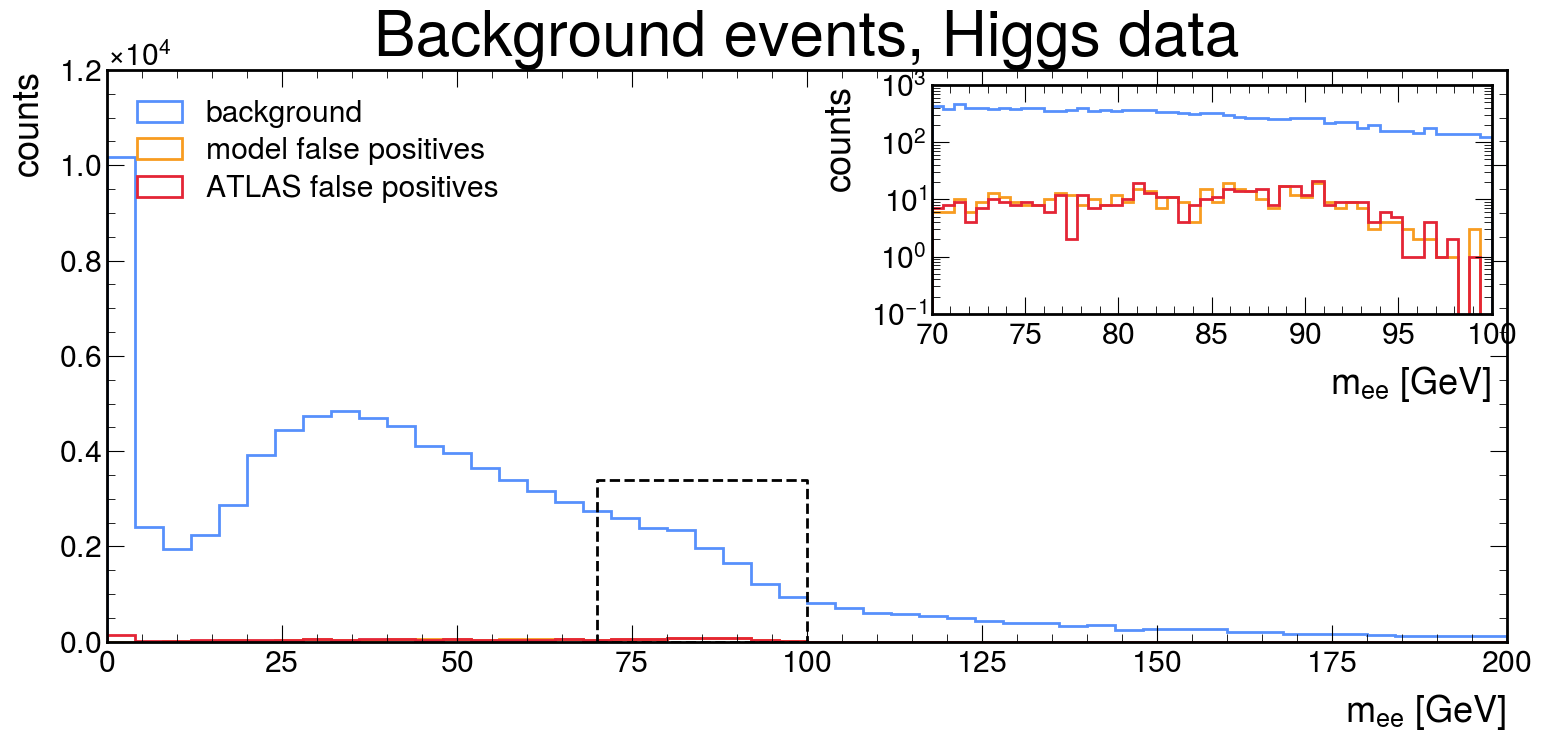

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(higgs_data['m_ee'][higgs_data['isZ']==0], bins=50, range=(0, 200), linewidth=2, histtype='step', label='background')
ax.hist(higgs_data['m_ee'][(higgs_data['isZ']==0) & higgs_data['prediction']], bins=50, range=(0, 200), linewidth=2, histtype='step', label='model false positives')
ax.hist(higgs_data['m_ee'][(higgs_data['isZ']==0) & higgs_data['ATLAS_label']], bins=50, range=(0, 200), linewidth=2, histtype='step', label='ATLAS false positives')

ax.plot([70, 100, 100, 70, 70], [0, 0, 3400,3400, 0], 'k--')
ax.legend(loc= 'upper left')
ax.set_xlabel('$m_{ee}$ [GeV]')
ax.set_ylabel('counts')


# Create inset of the second plot
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
ax_inset.hist(higgs_data['m_ee'][higgs_data['isZ']==0], bins=50, range=(70, 100), linewidth=2, histtype='step', label='background')
ax_inset.hist(higgs_data['m_ee'][(higgs_data['isZ']==0) & higgs_data['prediction']], bins=50, range=(70, 100), linewidth=2, histtype='step', label='model false positives')
ax_inset.hist(higgs_data['m_ee'][(higgs_data['isZ']==0) & higgs_data['ATLAS_label']], bins=50, range=(70, 100), linewidth=2, histtype='step', label='ATLAS false positives')
ax_inset.set_yscale('log')
ax_inset.set_xlabel('$m_{ee}$ [GeV]')
ax_inset.set_ylabel('counts')
# ax_inset.legend()
ax.set_title('Background events, Higgs data')

fig.tight_layout()
print('no')

print(ax_inset.get_ylim()[1])